# EDA 1: Project Notebook

## Table of contents

1. [Problem Statement](#section1)<br>
2. [Data Loading and Description](#section2)
3. [Data Profiling](#section3)
    - 3.1 [Understanding the Dataset](#section301)<br/>
    - 3.2 [Pre Profiling](#section302)<br/>
    - 3.3 [Preprocessing](#section303)<br/>
    - 3.4 [Post Profiling](#section304)<br/>
4. [Questions](#section4)
    - 4.1 [Off all the passengers, how many survived and how many died?](#section401)<br/>
    - 4.2 [Who is more likely to survive, Male or Female?](#section402)<br/>
    - 4.3 [What is the rate of survival of males, females and child on the basis of Passenger Class?](#section403)<br/>
    - 4.4 [What is the survival rate considering the Embarked variable?](#section404)<br/>
    - 4.5 [Survival rate - Comparing Embarked and Sex.](#section405)<br/>
    - 4.6 [How survival rate vary with Embarked, Sex and Pclass](#section406)<br/>
    - 4.7 [Segment age in bins with size 10.](#section407)<br/>
    - 4.8 [Analysing SibSp and Parch variable.](#section408)<br/>
    - 4.9 [Segment fare in bins of size 12.](#section409)<br/>
    - 4.10 [Draw pair plot to know the joint relationship between 'Fare','Age','Pclass' and 'Survived'](#section410)<br/>
    - 4.11 [Establish coorelation between all the features using heatmap.](#section411)<br/>
    - 4.12 [Hypothesis: Women and children are more likely to survive](#section412)<br/>
5. [Conclusions](#section5)<br/>  

### 1. Problem Statement



The notebooks explores the basic use of __Pandas__ and will cover the basic commands of __Exploratory Data Analysis(EDA)__ which includes __cleaning__, __munging__, __combining__, __reshaping__, __slicing__, __dicing__, and __transforming data__ for analysis purpose.

* __Exploratory Data Analysis__ <br/>
Understand the data by EDA and derive simple models with Pandas as baseline.
EDA ia a critical and first step in analyzing the data and we do this for below reasons :
    - Finding patterns in Data
    - Determining relationships in Data
    - Checking of assumptions
    - Preliminary selection of appropriate models
    - Detection of mistakes 


### 2. Data Loading

In [92]:
import pandas as pd
import numpy as np
import seaborn as sbs
import matplotlib
import pandas_profiling as pandas_profiling


movies_data = pd.read_csv("1000 movies data.csv")     # Importing training dataset using pd.read_csv
profile = pandas_profiling.ProfileReport(movies_data)
profile.to_file(outputfile="movies_before_preprocessing.html")

In [93]:
movies_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
Rank                  1000 non-null int64
Title                 1000 non-null object
Genre                 1000 non-null object
Description           1000 non-null object
Director              1000 non-null object
Actors                1000 non-null object
Year                  1000 non-null int64
Runtime (Minutes)     1000 non-null int64
Rating                1000 non-null float64
Votes                 1000 non-null int64
Revenue (Millions)    872 non-null float64
Metascore             936 non-null float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.8+ KB


In [94]:
#rename the columns to an easier name
movies_data.rename(columns={'Runtime (Minutes)': 'Runtime', 'Revenue (Millions)':'Revenue'}, inplace=True)

#Converting Year to datetime
movies_data['Year'] = pd.to_datetime(movies_data['Year'], format='%Y').dt.year

movies_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
Rank           1000 non-null int64
Title          1000 non-null object
Genre          1000 non-null object
Description    1000 non-null object
Director       1000 non-null object
Actors         1000 non-null object
Year           1000 non-null int64
Runtime        1000 non-null int64
Rating         1000 non-null float64
Votes          1000 non-null int64
Revenue        872 non-null float64
Metascore      936 non-null float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.8+ KB


In [95]:
movies_data.describe(include = 'all')
movies_data[movies_data.duplicated(subset='Title')]
movies_data.loc[movies_data['Title'] == 'The Host']

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime,Rating,Votes,Revenue,Metascore
239,240,The Host,"Action,Adventure,Romance",When an unseen enemy threatens mankind by taki...,Andrew Niccol,"Saoirse Ronan, Max Irons, Jake Abel, Diane Kruger",2013,125,5.9,96852,26.62,35.0
632,633,The Host,"Comedy,Drama,Horror",A monster emerges from Seoul's Han River and f...,Bong Joon Ho,"Kang-ho Song, Hee-Bong Byun, Hae-il Park, Doon...",2006,120,7.0,73491,2.20,85.0


### Observations:
1. There are 128 missing values in Revenue
2. There are 64 missing values in Metascore
3. 'The Host' movie is repeated twice in the dataset and looking at the descriptions, they seem to be two entire different movies.
4. Genre and Actors are a list in the column and should be split

Since we cannot fill in the missing values with the mean or the median since it would impact the shape, we should drop these two columns.

In [96]:
#Split the genre into three columns
# new data frame with split value columns 
newGenre = movies_data["Genre"].str.split(",", expand = True)
newGenre.head()

movies_data['Genre1'] = newGenre[0]
movies_data['Genre2'] = newGenre[1]
movies_data['Genre3'] = newGenre[2]
movies_data.drop(labels='Genre',axis=1, inplace=True)

In [97]:
movies_data.head()

,Rank,Title,Description,Director,Actors,Year,Runtime,Rating,Votes,Revenue,Metascore,Genre1,Genre2,Genre3
0,1,Guardians of the Galaxy,A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0,Action,Adventure,Sci-Fi
1,2,Prometheus,"Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0,Adventure,Mystery,Sci-Fi
2,3,Split,Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0,Horror,Thriller,None
3,4,Sing,"In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0,Animation,Comedy,Family
4,5,Suicide Squad,A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0,Action,Adventure,Fantasy


In [98]:
#Split the genre into three columns
# new data frame with split value columns 
actorsList = movies_data["Actors"].str.split(",", expand = True)
movies_data['Actor0'] = actorsList[0]
movies_data['Actor1'] = actorsList[1]
movies_data['Actor2'] = actorsList[2]
movies_data['Actor3'] = actorsList[3]
#movies_data.drop(labels='Actors',axis=1, inplace=True)
movies_data.head()

,Rank,Title,Description,Director,Actors,Year,Runtime,Rating,Votes,Revenue,Metascore,Genre1,Genre2,Genre3,Actor0,Actor1,Actor2,Actor3
0,1,Guardians of the Galaxy,A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0,Action,Adventure,Sci-Fi,Chris Pratt,Vin Diesel,Bradley Cooper,Zoe Saldana
1,2,Prometheus,"Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0,Adventure,Mystery,Sci-Fi,Noomi Rapace,Logan Marshall-Green,Michael Fassbender,Charlize Theron
2,3,Split,Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0,Horror,Thriller,None,James McAvoy,Anya Taylor-Joy,Haley Lu Richardson,Jessica Sula
3,4,Sing,"In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0,Animation,Comedy,Family,Matthew McConaughey,Reese Witherspoon,Seth MacFarlane,Scarlett Johansson
4,5,Suicide Squad,A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0,Action,Adventure,Fantasy,Will Smith,Jared Leto,Margot Robbie,Viola Davis


### Profiling again

In [99]:
profile = pandas_profiling.ProfileReport(movies_data)
profile.to_file(outputfile="movies_after_preprocessing.html")

In [148]:
#get the actors of the top 100 movies in a Series
actors = (movies_data.sort_values(['Revenue'], ascending=False).head(50))['Actors']

actorsList = actors.tolist()
len(actorsList)

actorsFullList = []

for actors in actorsList:
    actorsList = actors.split(sep=',')
    for actor in actorsList:
        actorsFullList.append(actor.strip())

len(actorsFullList)

actors = pd.Series(actorsFullList)
actors.value_counts()

Robert Downey Jr.      6
Daniel Radcliffe       4
Josh Hutcherson        4
Emma Watson            4
Liam Hemsworth         4
Rupert Grint           4
Jennifer Lawrence      4
Shia LaBeouf           4
Josh Duhamel           3
Tyrese Gibson          3
Chris Evans            3
Johnny Depp            3
Gwyneth Paltrow        3
Scarlett Johansson     2
Michael Gambon         2
Megan Fox              2
Taylor Lautner         2
Robert Pattinson       2
Woody Harrelson        2
Kristen Stewart        2
Christian Bale         2
Chris Pratt            2
Bradley Cooper         2
Don Cheadle            2
Idris Elba             2
Anne Hathaway          2
Zoe Saldana            2
Keira Knightley        2
Orlando Bloom          2
Vin Diesel             2
                      ..
Guy Pearce             1
Louis C.K.             1
Kristen Bell           1
Bill Murray            1
Idina Menzel           1
Cate Blanchett         1
Lewis Black            1
Diego Luna             1
Bill Nighy             1


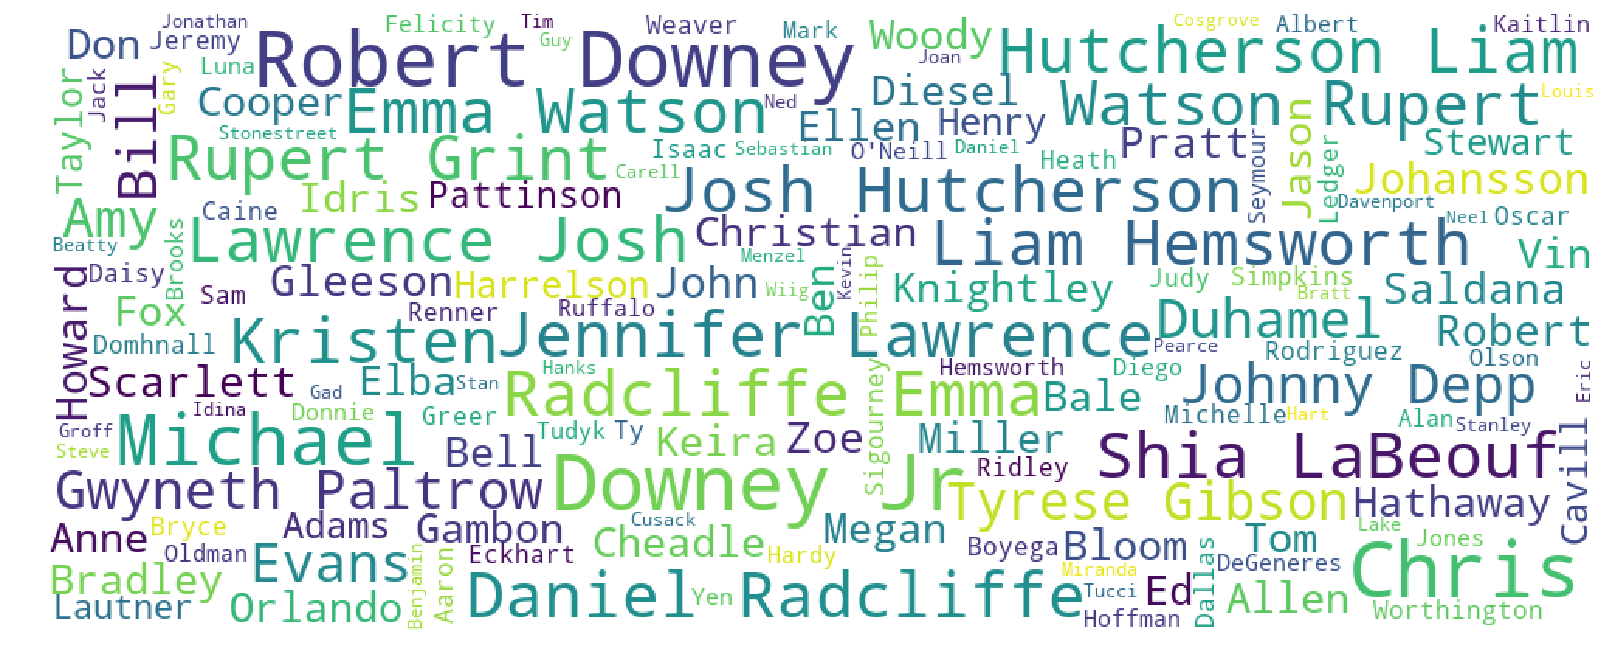

In [153]:
from wordcloud import WordCloud

# Convert the Series to string
text = actors.to_string(header=False, index=False)

# Generate a word cloud image
wordcloud = WordCloud().generate(text)

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt


# take relative word frequencies into account, lower max_font_size
wordcloud = WordCloud(width=1000, height=400, background_color="white", 
                              max_words= 150, max_font_size=50, relative_scaling=.5).generate(text)

plt.figure( figsize=(20,20) )
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

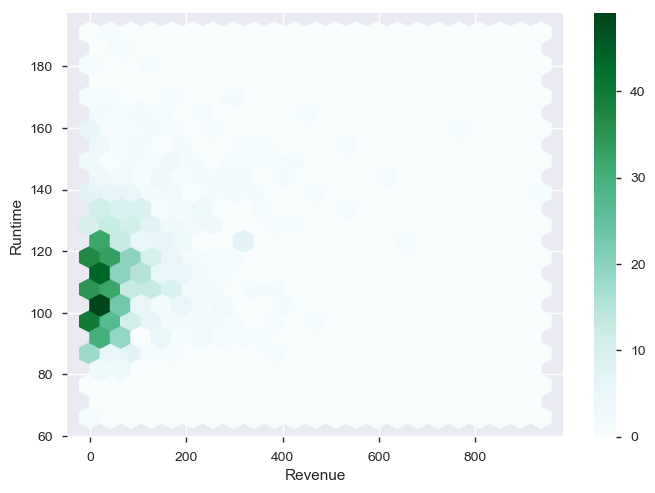

In [107]:
movies_data.plot.hexbin(x='Revenue', y='Runtime', gridsize=22)

In [14]:
import nltk
#nltk.download()
#nltk.download('averaged_perceptron_tagger')
#nltk.download('maxent_ne_chunker')
#nltk.download('words')

sentence = "The Harrier sits at 1714 mm and the Safari at 1965 mm a difference of 251 mm. The rear section is raised almost by 50% of the wheel width which on 235/65R17 tyres is about 366 mm. This is true of the X2 platform as well on which the Safari is built. As the hump is to compensate the loss of height in the third row it needs to be at least 200 mm which makes it more or less a similar height as the Safari."
tokens = nltk.word_tokenize(sentence)
tokens

tagged = nltk.pos_tag(tokens)

entities = nltk.chunk.ne_chunk(tagged)
print(entities)

type(entities)

from nltk.corpus import treebank
t = treebank.parsed_sents('wsj_0001.mrg')[0]
t.draw()

print([word for (word, pos) in nltk.pos_tag(nltk.word_tokenize(sentence)) if pos[0] == 'N'])

(S
  The/DT
  (ORGANIZATION Harrier/NNP)
  sits/NNS
  at/IN
  1714/CD
  mm/NN
  and/CC
  the/DT
  (ORGANIZATION Safari/NNP)
  at/IN
  1965/CD
  mm/NN
  a/DT
  difference/NN
  of/IN
  251/CD
  mm/NN
  ./.
  The/DT
  rear/JJ
  section/NN
  is/VBZ
  raised/VBN
  almost/RB
  by/IN
  50/CD
  %/NN
  of/IN
  the/DT
  wheel/NN
  width/NN
  which/WDT
  on/IN
  235/65R17/CD
  tyres/NNS
  is/VBZ
  about/IN
  366/CD
  mm/NN
  ./.
  This/DT
  is/VBZ
  true/JJ
  of/IN
  the/DT
  X2/NNP
  platform/NN
  as/RB
  well/RB
  on/IN
  which/WDT
  the/DT
  (ORGANIZATION Safari/NNP)
  is/VBZ
  built/VBN
  ./.
  As/IN
  the/DT
  hump/NN
  is/VBZ
  to/TO
  compensate/VB
  the/DT
  loss/NN
  of/IN
  height/NN
  in/IN
  the/DT
  third/JJ
  row/NN
  it/PRP
  needs/VBZ
  to/TO
  be/VB
  at/IN
  least/JJS
  200/CD
  mm/NN
  which/WDT
  makes/VBZ
  it/PRP
  more/RBR
  or/CC
  less/RBR
  a/DT
  similar/JJ
  height/NN
  as/IN
  the/DT
  (ORGANIZATION Safari/NNP)
  ./.)
['Harrier', 'sits', 'mm', 'Safari', 'mm', 'differe

58.985042735042626
Before fillna -  0
After fillna -  0


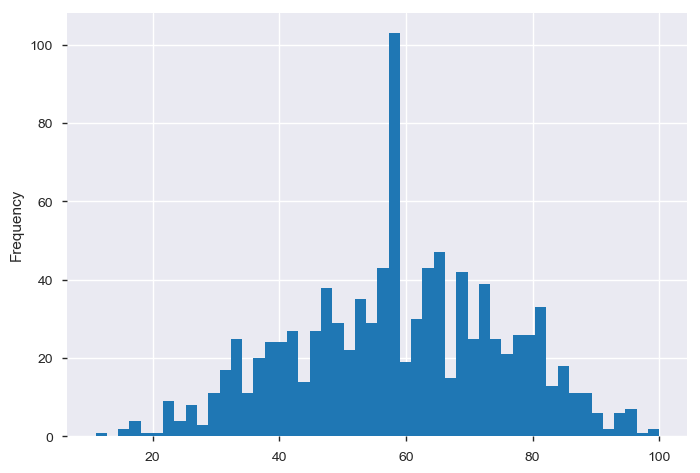

In [15]:
#Fix metascore missing data
#Metascore has 64 / 6.4% missing values Missing
# I think this can be filled with the mean values assuming that it is an average movie

''' Median	59.5 AND Mean	58.985
So there is not much difference between the median and the mean. The distribution of the data also seems fairly symmetric
Using mean to replace missing values
'''

mean_metascore = movies_data.Metascore.mean()
print(mean_metascore)

print('Before fillna - ', movies_data['Metascore'].isnull().sum())
movies_data.Metascore.fillna(mean_metascore, inplace=True)
print('After fillna - ', movies_data['Metascore'].isnull().sum())
movies_data['Metascore'].plot.hist(bins=50)


82.95637614678897 47.985
Before fillna -  128
After fillna -  128


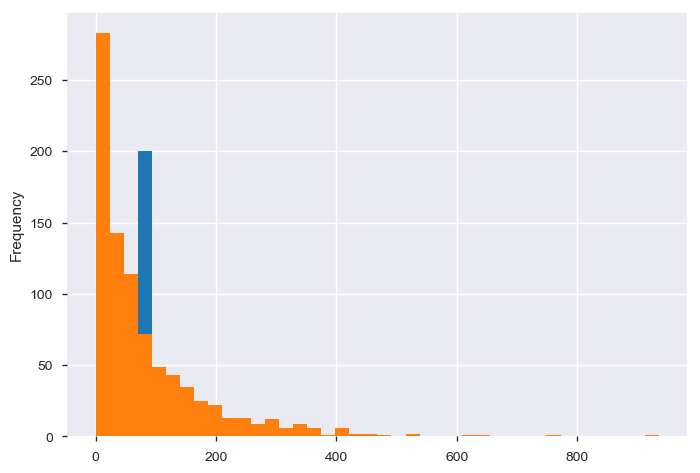

In [16]:
#Fix revenue missing values
#Revenue has 128 / 12.8% missing values Missing
#Can be filled in with either the mean or the median checking on the spread of data. 

import seaborn as sns

mean_revenue = movies_data.Revenue.mean()
median_revenue = movies_data.Revenue.median()
print(mean_revenue, median_revenue)


'''
Interquartile range	100.45
Q1	13.27
Q3	113.72
Median	47.985
Mean	82.956

The distribution seems to be right skewed/positively skewed with the mean much greater than the median. 
Median is closer to Q1 than Q3
'''
#sns.barplot(movies_data['Revenue'])

#I am distributing the data randomly between the mean and the medium so as not to change the shape of the histogram drastically
#movies_data.Revenue.fillna(median_revenue, inplace=False).plot.hist(bins=40)
import random


print('Before fillna - ', movies_data['Revenue'].isnull().sum())
#movies_data.Revenue.fillna(median_revenue, inplace=True)
movies_data.Revenue.fillna(random.randint(int(median_revenue), int(mean_revenue)), inplace=False).plot.hist(bins=40)
print('After fillna - ', movies_data['Revenue'].isnull().sum())

movies_data['Revenue'].plot.hist(bins=40)


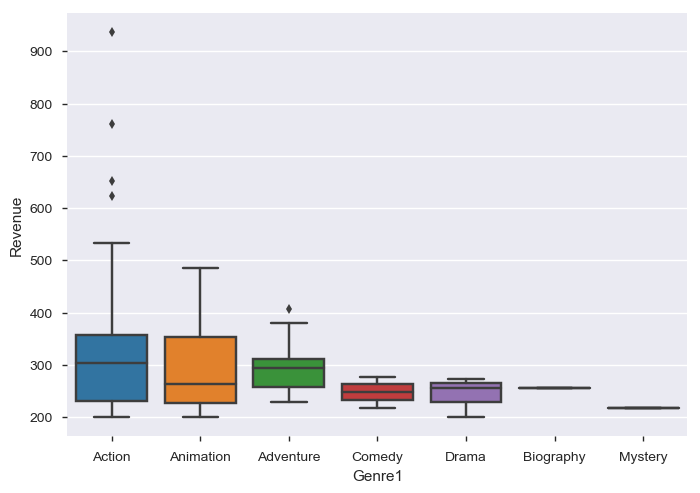

In [17]:
#Find out any correlation between genre and revenue

sns.boxplot(x="Genre1", y="Revenue", data=movies_data.sort_values('Revenue', ascending=False).head(100))

In [109]:
#How is the revenue distribution over the years?

movies_data.groupby(['Year'], as_index=False).sum().head()


,Year,Rank,Runtime,Rating,Votes,Revenue,Metascore
0,2006,25894,5317,313.5,11848758,3624.46,2641.0
1,2007,30559,6446,378.1,12949545,4306.23,2967.0
2,2008,32533,5763,352.8,14326280,5053.22,2813.0
3,2009,29928,5922,355.0,13044813,5292.26,2799.0
4,2010,35239,6668,409.6,15166939,5989.65,3504.0


[Text(0,0,'2006'),
 Text(0,0,'2007'),
 Text(0,0,'2008'),
 Text(0,0,'2009'),
 Text(0,0,'2010'),
 Text(0,0,'2011'),
 Text(0,0,'2012'),
 Text(0,0,'2013'),
 Text(0,0,'2014'),
 Text(0,0,'2015'),
 Text(0,0,'2016')]

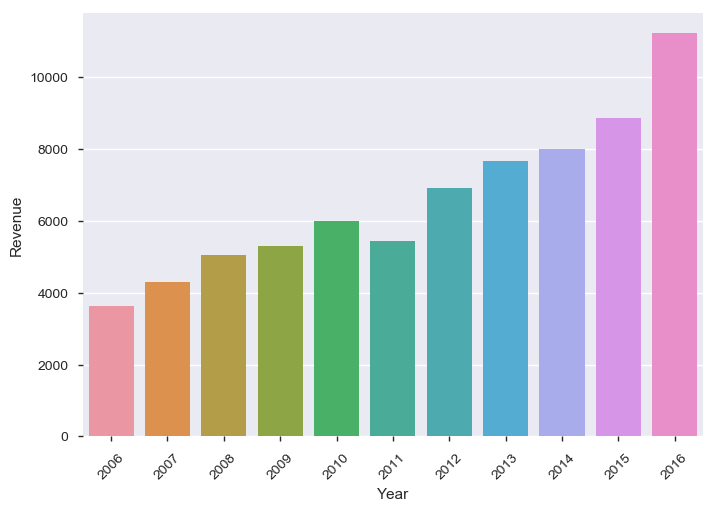

In [110]:


#NOTE: As_index is very important, if year becomes index then it cannot be used in the plot
barplot = sns.barplot(x='Year', y='Revenue', data=movies_data.groupby(['Year'], as_index=False).sum())
barplot.set_xticklabels(barplot.get_xticklabels(), rotation=45)

#movies_data.groupby(['Year'], as_index=False).sum().plot.bar(x='Year', y='Revenue')

[Text(0,0,'2006'),
 Text(0,0,'2007'),
 Text(0,0,'2008'),
 Text(0,0,'2009'),
 Text(0,0,'2010'),
 Text(0,0,'2011'),
 Text(0,0,'2012'),
 Text(0,0,'2013'),
 Text(0,0,'2014'),
 Text(0,0,'2015'),
 Text(0,0,'2016')]

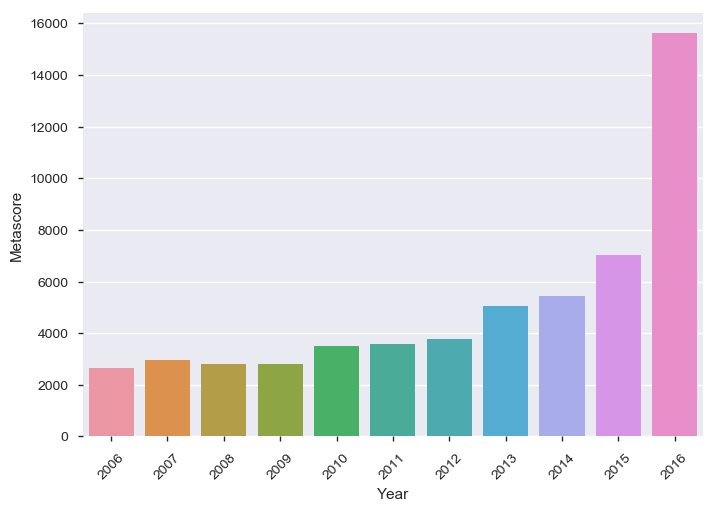

In [111]:
#Have scores become better or worse with the years? 
barplot = sns.barplot(x='Year', y='Metascore', data=movies_data.groupby(['Year'], as_index=False).sum())
barplot.set_xticklabels(barplot.get_xticklabels(), rotation=45)


[Text(0,0,'2006'),
 Text(0,0,'2007'),
 Text(0,0,'2008'),
 Text(0,0,'2009'),
 Text(0,0,'2010'),
 Text(0,0,'2011'),
 Text(0,0,'2012'),
 Text(0,0,'2013'),
 Text(0,0,'2014'),
 Text(0,0,'2015'),
 Text(0,0,'2016')]

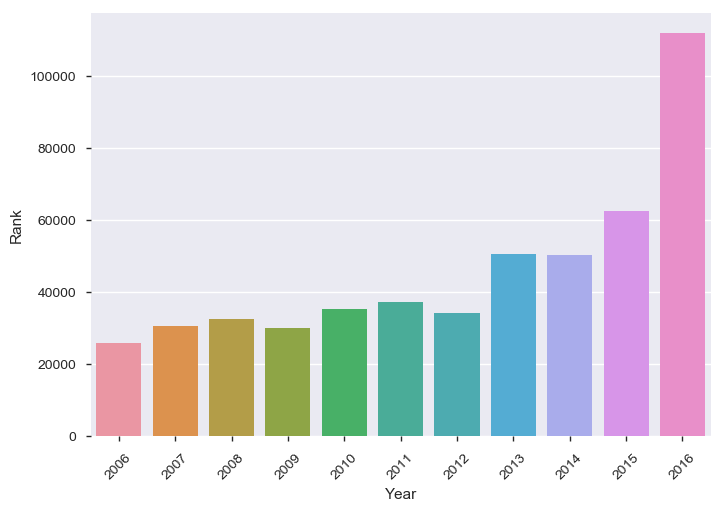

In [112]:
#number of movies distribution over the years in the sample

#barplot = sns.barplot(x='Year', y='Count', data=movies_data.groupby(['Year'], as_index=False).sum())

movies_data.groupby(['Year'], as_index=False).count()

barplot = sns.barplot(x='Year', y='Rank', data=movies_data.groupby(['Year'], as_index=False).sum())
barplot.set_xticklabels(barplot.get_xticklabels(), rotation=45)



[Text(0,0,'2006'),
 Text(0,0,'2007'),
 Text(0,0,'2008'),
 Text(0,0,'2009'),
 Text(0,0,'2010'),
 Text(0,0,'2011'),
 Text(0,0,'2012'),
 Text(0,0,'2013'),
 Text(0,0,'2014'),
 Text(0,0,'2015'),
 Text(0,0,'2016')]

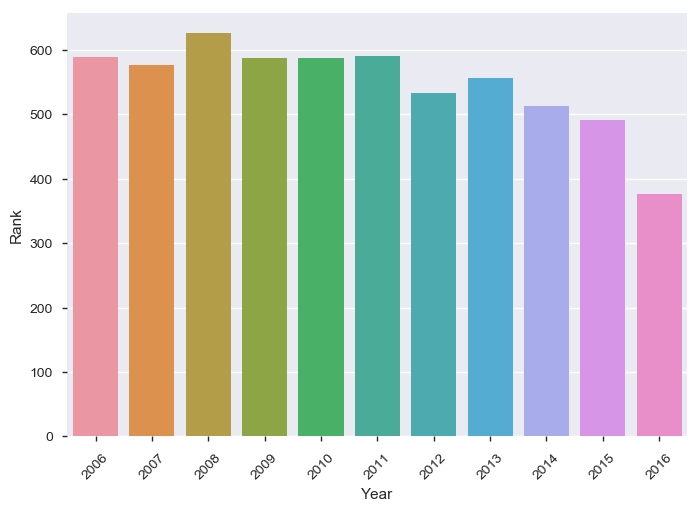

In [113]:
#Find out average score for every year
movies_data.groupby(['Year'], as_index=False).mean()

barplot = sns.barplot(x='Year', y='Rank', data=movies_data.groupby(['Year'], as_index=False).mean())
barplot.set_xticklabels(barplot.get_xticklabels(), rotation=45)

In [124]:
#Find out the unique genres

gen_unq = pd.concat([movies_data['Genre1'], movies_data['Genre2'], movies_data['Genre3']]).unique()
print(gen_unq)

['Action' 'Adventure' 'Horror' 'Animation' 'Comedy' 'Biography' 'Drama'
 'Crime' 'Romance' 'Mystery' 'Thriller' 'Sci-Fi' 'Fantasy' None 'Family'
 'History' 'Music' 'Western' 'War' 'Musical' 'Sport']


,Rank,Title,Description,Director,Actors,Year,Runtime,Rating,Votes,Revenue,Metascore,Genre1,Genre2,Genre3,Actor0,Actor1,Actor2,Actor3
0,1,Guardians of the Galaxy,A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0,Action,Adventure,Sci-Fi,Chris Pratt,Vin Diesel,Bradley Cooper,Zoe Saldana
1,2,Prometheus,"Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0,Adventure,Mystery,Sci-Fi,Noomi Rapace,Logan Marshall-Green,Michael Fassbender,Charlize Theron
2,3,Split,Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0,Horror,Thriller,None,James McAvoy,Anya Taylor-Joy,Haley Lu Richardson,Jessica Sula
3,4,Sing,"In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0,Animation,Comedy,Family,Matthew McConaughey,Reese Witherspoon,Seth MacFarlane,Scarlett Johansson
4,5,Suicide Squad,A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0,Action,Adventure,Fantasy,Will Smith,Jared Leto,Margot Robbie,Viola Davis


[Text(0,0,'Action'),
 Text(0,0,'Adventure'),
 Text(0,0,'Horror'),
 Text(0,0,'Animation'),
 Text(0,0,'Comedy'),
 Text(0,0,'Biography'),
 Text(0,0,'Drama'),
 Text(0,0,'Crime'),
 Text(0,0,'Romance'),
 Text(0,0,'Mystery'),
 Text(0,0,'Thriller'),
 Text(0,0,'Sci-Fi'),
 Text(0,0,'Fantasy')]

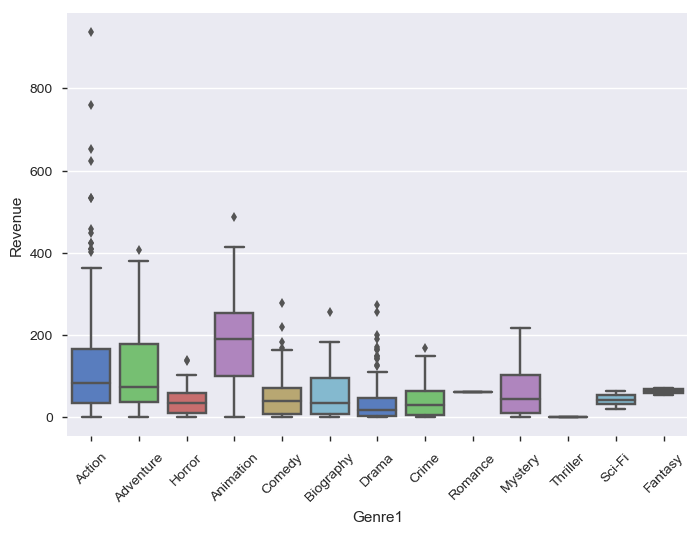

In [132]:
movies_data.groupby(['Genre1','Genre2', 'Genre3'])['Revenue'].count()
boxplot = sns.boxplot(x="Genre1", y="Revenue",data=movies_data, palette="muted")
boxplot.set_xticklabels(boxplot.get_xticklabels(), rotation=45)


[Text(0,0,'Comedy'),
 Text(0,0,'Horror'),
 Text(0,0,'Action'),
 Text(0,0,'Fantasy'),
 Text(0,0,'Crime'),
 Text(0,0,'Drama'),
 Text(0,0,'Sci-Fi'),
 Text(0,0,'Mystery'),
 Text(0,0,'Thriller'),
 Text(0,0,'Adventure'),
 Text(0,0,'Biography'),
 Text(0,0,'Animation'),
 Text(0,0,'Romance')]

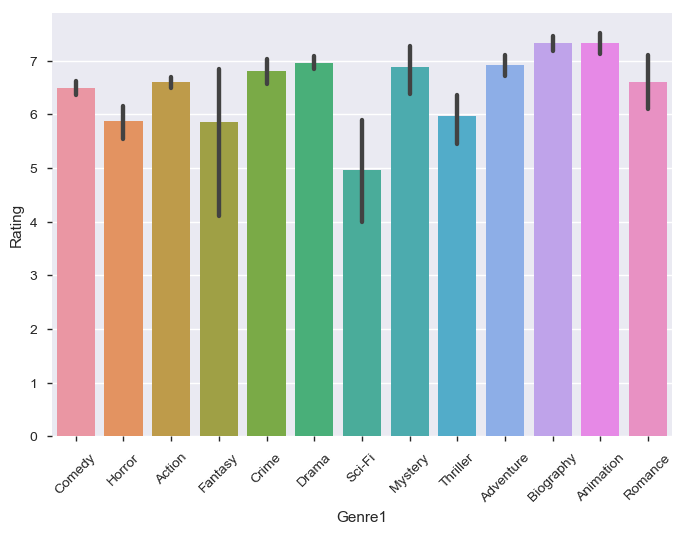

In [142]:
#ratings vs genre
#barplot = sns.barplot(x='Genre1', y='Rating', data = movies_data.groupby(['Genre1'], as_index=False))
barplot = sns.barplot(x='Genre1', y='Rating', data = movies_data.sort_values(['Rating']))
barplot.set_xticklabels(barplot.get_xticklabels(), rotation=45)

[Text(0,0,'2006'),
 Text(0,0,'2007'),
 Text(0,0,'2008'),
 Text(0,0,'2009'),
 Text(0,0,'2010'),
 Text(0,0,'2011'),
 Text(0,0,'2012'),
 Text(0,0,'2013'),
 Text(0,0,'2014'),
 Text(0,0,'2015'),
 Text(0,0,'2016')]

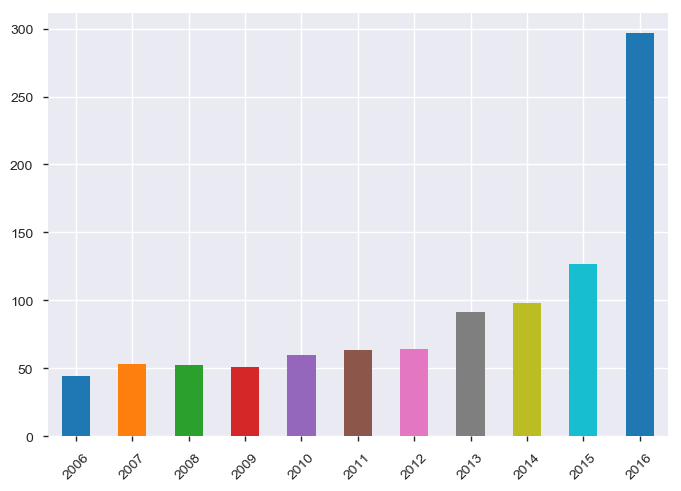

In [145]:
#Number of movies made per year
yearlyCount = movies_data['Year'].value_counts().sort_index().plot.bar()
yearlyCount.set_xticklabels(yearlyCount.get_xticklabels(), rotation=45)

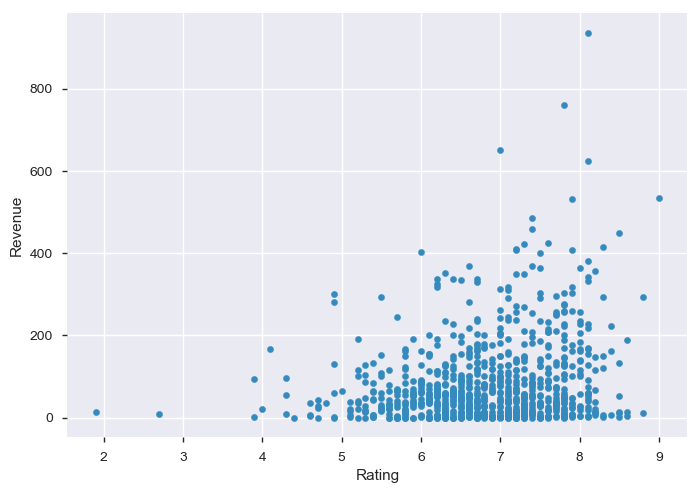

In [146]:
movies_data.plot.scatter(x='Rating', y = 'Revenue')

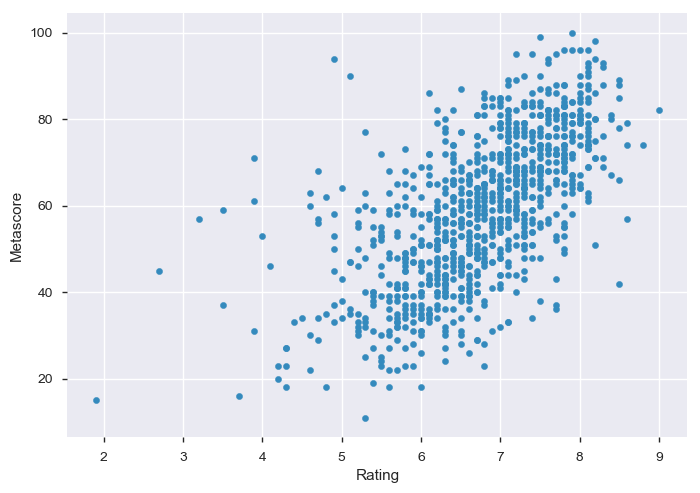

In [147]:
movies_data.plot.scatter(x='Rating', y = 'Metascore')

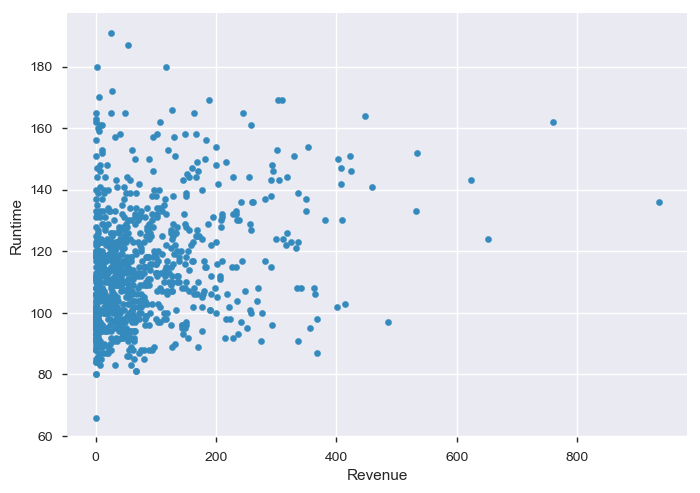

In [154]:
movies_data.plot.scatter(x='Revenue', y = 'Runtime')